# Week 6: Introduction to Pytorch & Neural Networks


## Chapter Outline
<hr>

<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-Learning-Objectives" data-toc-modified-id="Chapter-Learning-Objectives-2">Chapter Learning Objectives</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3">Imports</a></span></li><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-4">1. Introduction</a></span></li><li><span><a href="#2.-PyTorch's-Tensor" data-toc-modified-id="2.-PyTorch's-Tensor-5">2. PyTorch's Tensor</a></span></li><li><span><a href="#3.-Neural-Network-Basics" data-toc-modified-id="3.-Neural-Network-Basics-6">3. Neural Network Basics</a></span></li></ul></div>

## Chapter Learning Objectives
<hr>

- Describe the difference between `NumPy` and `torch` arrays (`np.array` vs. `torch.Tensor`).
- Explain fundamental concepts of neural networks such as layers, nodes, activation functions, etc.
- Create a simple neural network in PyTorch for regression or classification.

## Imports
<hr>

In [7]:
import sys
import numpy as np
import pandas as pd
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## 1. Introduction
<hr>

PyTorch is a Python-based tool for scientific computing that provides several main features:
- `torch.Tensor`, an n-dimensional array similar to that of `NumPy`, but which can run on GPUs
- Computational graphs and an automatic differentiation enginge for building and training neural networks

You can install PyTorch from: https://pytorch.org/.

## 2. PyTorch's Tensor
<hr>

In PyTorch a tensor is just like NumPy's `ndarray`.

A key difference between PyTorch's `torch.Tensor` and NumPy's `np.array` is that `torch.Tensor` was constructed to integrate with GPUs and PyTorch's computational graphs (more on that next chapter though).

### 2.1. `ndarray` vs `tensor`

Creating and working with tensors is much the same as with NumPy `ndarrays`. You can create a tensor with `torch.tensor()`:

In [11]:
tensor_1 = torch.tensor([1, 2, 3])
tensor_2 = torch.tensor([1, 2, 3], dtype=torch.float32)
tensor_3 = torch.tensor(np.array([1, 2, 3]))

for t in [tensor_1, tensor_2, tensor_3]:
    print(f"{t}, dtype: {t.dtype}")

tensor([1, 2, 3]), dtype: torch.int64
tensor([1., 2., 3.]), dtype: torch.float32
tensor([1, 2, 3], dtype=torch.int32), dtype: torch.int32


PyTorch also comes with most of the `NumPy` functions you're probably already familiar with:

In [14]:
torch.zeros(2, 2)  # zeroes

tensor([[0., 0.],
        [0., 0.]])

In [31]:
torch.ones(2, 2)  # ones

tensor([[1., 1.],
        [1., 1.]])

In [33]:
torch.randn(3, 2)  # random normal

tensor([[-1.1673, -1.0663],
        [ 1.7925,  1.4079],
        [-0.3534,  1.8531]])

In [35]:
torch.rand(4, 2, 3)  # rand uniform

tensor([[[0.3231, 0.4408, 0.7248],
         [0.3414, 0.8445, 0.5291]],

        [[0.2115, 0.8386, 0.8390],
         [0.4365, 0.8232, 0.3998]],

        [[0.8507, 0.9777, 0.7608],
         [0.6548, 0.2650, 0.1653]],

        [[0.9978, 0.5335, 0.0116],
         [0.4559, 0.8475, 0.0444]]])

Just like in NumPy we can look at the shape of a tensor with the `.shape` attribute:

In [42]:
x = torch.rand(2, 3, 2, 2)
print(x)
x.shape

tensor([[[[0.8134, 0.7724],
          [0.0589, 0.2432]],

         [[0.3921, 0.6546],
          [0.1672, 0.5449]],

         [[0.9067, 0.7880],
          [0.3009, 0.8287]]],


        [[[0.1926, 0.4789],
          [0.9052, 0.1087]],

         [[0.4255, 0.0735],
          [0.1751, 0.4289]],

         [[0.9417, 0.9977],
          [0.0394, 0.4238]]]])


torch.Size([2, 3, 2, 2])

In [44]:
x.ndim

4

### 2.2. Tensors and Data Types

Different data types have different memory and computational implications. In Pytorch we'll be building networks that require thousands or even millions of floating point calculations! In such cases, using a smaller dtype like `float32` can significantly speed up computations and reduce memory requirements. The default float dtype in pytorch `float32`, as opposed to NumPy's `float64`.

In [48]:
print(np.array([3.14159]).dtype)
print(torch.tensor([3.14159]).dtype)

float64
torch.float32


But just like in NumPy, you can always specify the particular dtype you want using the `dtype` argument:

In [51]:
print(torch.tensor([3.14159], dtype=torch.float64).dtype)

torch.float64


### 2.3. Operations on Tensors

Tensors operate just like `ndarrays` and have a variety of familiar methods that can be called off them:

In [59]:
a = torch.rand(1, 3)
b = torch.rand(3, 1)

print(a, "\n", b)
a + b  # broadcasting betweean a 1 x 3 and 3 x 1 tensor

tensor([[0.1807, 0.1162, 0.3050]]) 
 tensor([[0.1315],
        [0.6960],
        [0.4720]])


tensor([[0.3122, 0.2476, 0.4364],
        [0.8767, 0.8122, 1.0010],
        [0.6527, 0.5881, 0.7769]])

In [61]:
a * b

tensor([[0.0238, 0.0153, 0.0401],
        [0.1258, 0.0809, 0.2123],
        [0.0853, 0.0548, 0.1439]])

In [63]:
a.mean()

tensor(0.2006)

In [65]:
a.sum()

tensor(0.6018)

### 2.4. Indexing

Once again, same as NumPy!

In [69]:
X = torch.rand(5, 2)
print(X)

tensor([[0.7068, 0.4126],
        [0.1003, 0.5177],
        [0.5327, 0.3558],
        [0.4668, 0.0233],
        [0.2749, 0.2821]])


In [75]:
print(X[0, :])
print(X[0])
print(X[:, 1])

tensor([0.7068, 0.4126])
tensor([0.7068, 0.4126])
tensor([0.4126, 0.5177, 0.3558, 0.0233, 0.2821])


### 2.5. GPU and CUDA Tensors

GPU stands for "graphical processing unit" (as opposed to a CPU: central processing unit). GPUs were originally developed for gaming, they are very fast at performing operations on large amounts of data by performing them in parallel (think about updating the value of all pixels on a screen very quickly as a player moves around in a game). More recently, GPUs have been adapted for more general purpose programming. Neural networks can typically be broken into smaller computations that can be performed in parallel on a GPU. PyTorch is tightly integrated with CUDA - a software layer that facilitates interactions with a GPU (if you have one). You can check if you have GPU capability using:

In [81]:
torch.cuda.is_available()  # my MacBook Pro does not have a GPU

False

When training on a machine that has a GPU, you need to tell PyTorch you want to use it. You'll see the following at the top of most PyTorch code:

In [84]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


You can then use the `device` argument when creating tensors to specify whether you wish to use a CPU or GPU. Or if you want to move a tensor between the CPU and GPU, you can use the `.to()` method:

In [87]:
X = torch.rand(2, 2, 2, device=device)
print(X.device)

cpu


In [89]:
# X.to('cuda')  # this would give me an error as I don't have a GPU so I'm commenting out

We'll revisit GPUs later in the course when we are working with bigger datasets and more complex networks. For now, we can work on the CPU just fine.

## 3. Neural Network Basics
<hr>

It's probably that you've already learned about several machine learning algorithms (kNN, Random Forest, SVM, etc.). Neural networks are simply another algorithm and actually one of the simplest in my opinion! As we'll see, a neural network is just a sequence of linear and non-linear transformations. Often you see something like this when learning about/using neural networks:

![](https://raw.githubusercontent.com/Shangyue-CWU/CS457Draft/refs/heads/main/img/nn-6.png)

So what on Earth does that all mean? Well we are going to build up some intuition one step at a time.

### 3.1. Simple Linear Regression with a Neural Network

Let's create a simple regression dataset with 500 observations:

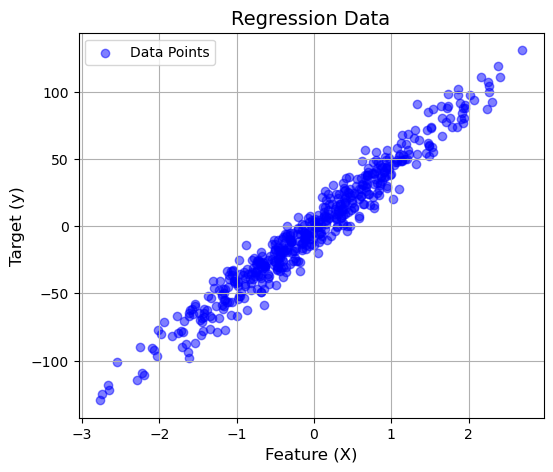

In [98]:
X, y = make_regression(n_samples=500, n_features=1, random_state=0, noise=10.0)
import matplotlib.pyplot as plt
%matplotlib inline
# plot_regression(X, y)
# Plot the regression data
plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.title('Regression Data', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

We can fit a simple linear regression to this data using sklearn:

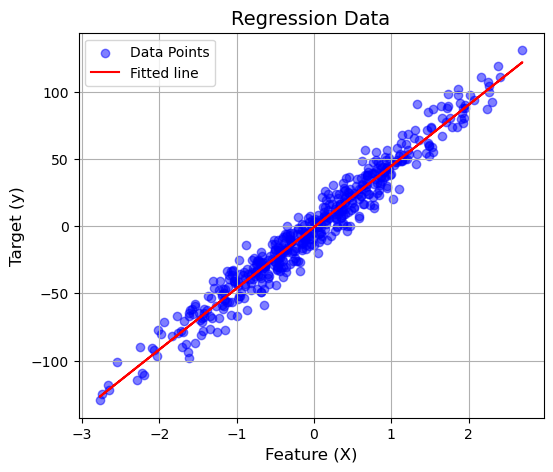

In [101]:
sk_model = LinearRegression().fit(X, y)

plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')

plt.plot(X, sk_model.predict(X), color='red', label='Fitted line')
plt.title('Regression Data', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [103]:
# plot_regression(X, y, sk_model.predict(X))

Here are the parameters of that fitted line:

In [106]:
print(f"w_0: {sk_model.intercept_:.2f} (bias/intercept)")
print(f"w_1: {sk_model.coef_[0]:.2f}")

w_0: -0.77 (bias/intercept)
w_1: 45.50


As an equation, that looks like this:

$$\hat{y}=-0.77 + 45.50X$$

Or in matrix form:

$$\begin{bmatrix} \hat{y_1} \\ \hat{y_2} \\ \vdots \\ \hat{y_n} \end{bmatrix}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} -0.77 \\ 45.55 \end{bmatrix}$$

Or in graph form I'll represent it like this: 

![](https://raw.githubusercontent.com/Shangyue-CWU/CS457Draft/refs/heads/main/img/nn-1.png)

### 3.2. Linear Regression with a Neural Network in PyTorch

So let's implement the above in PyTorch to start gaining an intuition about neural networks! Almost every neural network model you build in PyTorch will inherit from `torch.nn.Module`. 

Let's create a model called `linearRegression`:

In [111]:
class linearRegression(nn.Module):  # our class inherits from nn.Module and we can call it anything we like
    def __init__(self, input_size, output_size):
        super().__init__()                                # super().__init__() makes our class inherit everything from torch.nn.Module
        self.linear = nn.Linear(input_size, output_size)  # this is a simple linear layer: wX + b

    def forward(self, x):
        out = self.linear(x)
        return out

Let's step through the above:

```python
class linearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__() 
```

^ Here we're creating a class called `linearRegression` and inheriting the methods and attributes of `nn.Module` (hint: try typing `help(linearRegression)` to see all the things we inheritied from `nn.Module`).

```python
        self.linear = nn.Linear(input_size, output_size)
```

^ Here we're defining a "Linear" layer, which just means `wX + b`, i.e., the weights of the network, multiplied by the input features plus the bias.

```python
    def forward(self, x):
        out = self.linear(x)
        return out
```

^ PyTorch networks created with `nn.Module` must have a `forward()` method. It accepts the input data `x` and passes it through the defined operations. In this case, we are passing `x` into our linear layer and getting an output `out`.

After defining the model class, we can create an instance of that class:

In [115]:
model = linearRegression(input_size=1, output_size=1)

![](https://raw.githubusercontent.com/Shangyue-CWU/CS457Draft/refs/heads/main/img/nn-2.png)

We can check out our model using `print()`:

In [119]:
print(model)

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Or the more useful `summary()` (which we imported at the top of this notebook with `from torchsummary import summary`):

In [126]:
summary(model, (1,));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1]                   2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Notice how we have two parameters? We have one for the weight (`w1`) and one for the bias (`w0`). These were initialized randomly by PyTorch when we created our model. They can be accessed with `model.state_dict()`:

In [129]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.2439]])),
             ('linear.bias', tensor([0.0641]))])

Okay, before we move on, the `x` and `y` data I created are currently NumPy arrays but they need to be PyTorch tensors. Let's convert them:

In [132]:
X_t = torch.tensor(X, dtype=torch.float32)  # I'll explain requires_grad next Chapter
y_t = torch.tensor(y, dtype=torch.float32)

We have a working model right now and could tell it to give us some output with this syntax:

In [135]:
y_p = model(X_t[0]).item()
print(f"Predicted: {y_p:.2f}")
print(f"   Actual: {y[0]:.2f}")

Predicted: -0.09
   Actual: 31.08


Our prediction is pretty bad because our model is not trained/fitted yet! As we learned in the past few chapters, to fit our model we need:
1. **a loss function** (called "criterion" in PyTorch) to tell us how good/bad our predictions are - we'll use **Mean Squared Error**, `torch.nn.MSELoss()`
2. **an optimization algorithm** to help optimise model parameters - we'll use **Stochastic Gradient Descent**, `torch.optim.SGD()`

In [138]:
LEARNING_RATE = 0.1
criterion = nn.MSELoss()  # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm is SGD

Before we train, we're going to create a "data loader" to help batch my data. We'll talk more about these in later chapters but just think of them as generators that yield data to us on request. We'll use a `BATCH_SIZE = 50` (which should give us 10 batches because we have 500 data points):

In [141]:
BATCH_SIZE = 50
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

So, we should have 10 batches:

In [144]:
print(f"Total number of batches: {len(dataloader)}")

Total number of batches: 10


We can look at a batch using this syntax:

In [147]:
XX, yy = next(iter(dataloader))
print(f" Shape of feature data (X) in batch: {XX.shape}")
print(f"Shape of response data (y) in batch: {yy.shape}")

 Shape of feature data (X) in batch: torch.Size([50, 1])
Shape of response data (y) in batch: torch.Size([50])


With our data loader defined, let's train our simple network for 5 epochs of SGD!

> I'll explain all the code here next chapter but scan throught it, it's not too hard to see what's going on!

In [153]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    """Simple training wrapper for PyTorch network."""
    
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()       # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten()  # Forward pass to get output
            loss = criterion(y_hat, y)  # Calculate loss
            loss.backward()             # Getting gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            losses += loss.item()       # Add loss for this batch to running total
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
   
trainer(model, criterion, optimizer, dataloader, epochs=50, verbose=True)

epoch: 1, loss: 93.5587
epoch: 2, loss: 93.3654
epoch: 3, loss: 93.4111
epoch: 4, loss: 93.6386
epoch: 5, loss: 93.8698
epoch: 6, loss: 93.8765
epoch: 7, loss: 94.1180
epoch: 8, loss: 93.9451
epoch: 9, loss: 93.6442
epoch: 10, loss: 94.0061
epoch: 11, loss: 93.4828
epoch: 12, loss: 93.4675
epoch: 13, loss: 93.8928
epoch: 14, loss: 93.7375
epoch: 15, loss: 93.8799
epoch: 16, loss: 93.6169
epoch: 17, loss: 94.0439
epoch: 18, loss: 93.6380
epoch: 19, loss: 93.6882
epoch: 20, loss: 93.5867
epoch: 21, loss: 94.3069
epoch: 22, loss: 93.9643
epoch: 23, loss: 93.6591
epoch: 24, loss: 93.6559
epoch: 25, loss: 94.2340
epoch: 26, loss: 93.6998
epoch: 27, loss: 93.7497
epoch: 28, loss: 93.6316
epoch: 29, loss: 93.9796
epoch: 30, loss: 94.3379
epoch: 31, loss: 93.6921
epoch: 32, loss: 93.4950
epoch: 33, loss: 93.8505
epoch: 34, loss: 93.6967
epoch: 35, loss: 93.4422
epoch: 36, loss: 93.7779
epoch: 37, loss: 93.3751
epoch: 38, loss: 94.0249
epoch: 39, loss: 93.6406
epoch: 40, loss: 93.8226
epoch: 41

Now our model has been trained, our parameters should be different than before:

In [156]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[45.0886]])),
             ('linear.bias', tensor([-0.6664]))])

Comparing to the sklearn model, we get a very similar answer:

In [159]:
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'].item()]},
             index=['sklearn', 'pytorch']).round(2)

,w0,w1
sklearn,-0.77,45.50
pytorch,-0.67,45.09


We got pretty close! We could do better by changing the number of epochs or the learning rate. So here is our simple network once again:

![](https://raw.githubusercontent.com/Shangyue-CWU/CS457Draft/refs/heads/main/img/nn-2.png)

By the way, check out what happens if we run `trainer()` again:

In [163]:
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 93.8280
epoch: 2, loss: 93.6879
epoch: 3, loss: 93.7587
epoch: 4, loss: 93.7860
epoch: 5, loss: 94.1696


Our model continues where we left off! This may or may not be what you want. We can start from scratch by re-making our `model` and `optimizer`.

### 3.3. Multiple Linear Regression with a Neural Network

Okay, let's do a multiple linear regression now with 3 features. So our network will look like this:

![](https://raw.githubusercontent.com/Shangyue-CWU/CS457Draft/refs/heads/main/img/nn-3.png)

Let's go ahead and create some data:

In [168]:
# Create dataset
X, y = make_regression(n_samples=500, n_features=3, random_state=0, noise=10.0) # sklearn
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)
# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

And let's create the above model:

In [171]:
model = linearRegression(input_size=3, output_size=1)

We should now have 4 parameters (3 weights and 1 bias):

In [174]:
summary(model, (3,));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1]                   4
Total params: 4
Trainable params: 4
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Looks good to me! Let's train the model and then compare it to sklearn's `LinearRegression()`:

In [177]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 1015.6343
epoch: 2, loss: 110.8233
epoch: 3, loss: 101.8023
epoch: 4, loss: 102.3484
epoch: 5, loss: 101.8241


In [179]:
sk_model = LinearRegression().fit(X, y)
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'][0, 0].item()],
              "w2": [sk_model.coef_[1], model.state_dict()['linear.weight'][0, 1].item()],
              "w3": [sk_model.coef_[2], model.state_dict()['linear.weight'][0, 2].item()]},
             index=['sklearn', 'pytorch']).round(2)

,w0,w1,w2,w3
sklearn,0.43,0.62,55.99,11.14
pytorch,0.16,0.75,55.37,11.19


### 3.4. Non-linear Regression with a Neural Network

Okay so we've made simple networks to imitate simple and multiple *linear* regression. You're probably thinking, so what? But we're getting to the good stuff I promise! For example, what happens when we have more complicated datasets like this?

In [183]:
# Create dataset
np.random.seed(2020)
X = np.sort(np.random.randn(500))
y = X ** 2 + 15 * np.sin(X) **3
X_t = torch.tensor(X[:, None], dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

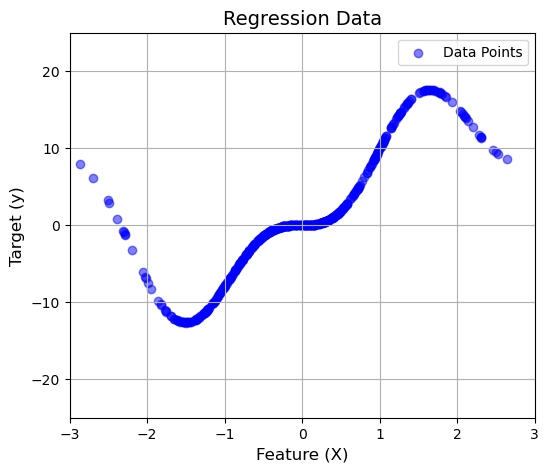

In [185]:
plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.title('Regression Data', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.ylim([-25,25])
plt.xlim([-3,3])
plt.grid(True)
plt.legend()
plt.show()

This is obviously non-linear, and we need to introduce some **non-linearities** into our network. These non-linearities are what make neural networks so powerful and they are called **"activation functions"**. We are going to create a new model class that includes a non-linearity - a sigmoid function:

$$S(X)=\frac{1}{1+e^{-x}}$$

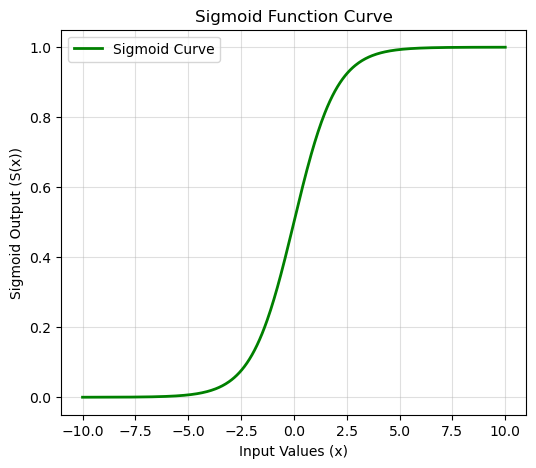

In [188]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of x values
x_range = np.linspace(-10, 10, 500)  # Covers a wide range to show the curve
sigmoid_values = sigmoid(x_range)

# Plot the sigmoid curve
plt.figure(figsize=(6, 5))
plt.plot(x_range, sigmoid_values, label="Sigmoid Curve", color="green", linewidth=2)

# Adding labels and title
# plt.axvline(0, color='gray', linestyle='--', alpha=0.7)  # Highlight x=0 (decision boundary)
# plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7)  # Highlight y=0.5
plt.xlabel("Input Values (x)")
plt.ylabel("Sigmoid Output (S(x))")
plt.title("Sigmoid Function Curve")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

# xs = np.linspace(-15, 15, 100)
# plot_regression(xs, [0], sigmoid(xs), x_range=[-5, 5], y_range=[0, 1], dy=0.2)

We'll talk more about activation functions later, but note how the sigmoid function non-linearly maps `x` to a value between 0 and 1. Okay, so let's create the following network:

![](https://raw.githubusercontent.com/Shangyue-CWU/CS457Draft/refs/heads/main/img/nn-5.png)

All this means is that the value of each node in the hidden layer will be transformed by the "activation function", thus introducing non-linear elements to our model! There's two main ways of creating the above model in PyTorch, I'll show you both:

In [193]:
class nonlinRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden(x)       # input -> hidden layer
        x = self.sigmoid(x)      # sigmoid activation function in hidden layer
        x = self.output(x)       # hidden -> output layer
        return x

Note how our `forward()` method now passes `x` through the `nn.Sigmoid()` function after the hidden layer. The above method is very clear and flexible, but I prefer using `nn.Sequential()` to combine my layers together in the constructor:

In [196]:
class nonlinRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            nn.Linear(input_size, hidden_size),  # input -> hidden layer
            nn.Sigmoid(),                        # sigmoid activation function in hidden layer
            nn.Linear(hidden_size, output_size)  # hidden -> output layer
        )

    def forward(self, x):
        x = self.main(x)
        return x

Let's make an instance of our new class and confirm it has 10 parameters (6 weights + 4 biases):

In [199]:
model = nonlinRegression(1, 3, 1)
summary(model, (1,));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 3]                   6
|    └─Sigmoid: 2-2                      [-1, 3]                   --
|    └─Linear: 2-3                       [-1, 1]                   4
Total params: 10
Trainable params: 10
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Okay, let's train:

In [210]:
criterion = nn.MSELoss() # Mean Squared Error (MSE) Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.3) # Stochastic Gradient Descent (SGD) lr (learning rate) = 0.3

# Call the training function to train the model
# - model: The neural network to train
# - criterion: The loss function used to calculate the error
# - optimizer: The optimization algorithm to update model parameters
# - dataloader: Provides batches of data for training
# - epochs: Number of times the entire dataset is passed through the model
# - verbose: If True, provides detailed output during training (e.g., loss values after each epoch)
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 4.1686
epoch: 2, loss: 4.1258
epoch: 3, loss: 4.1132
epoch: 4, loss: 4.2354
epoch: 5, loss: 4.0611


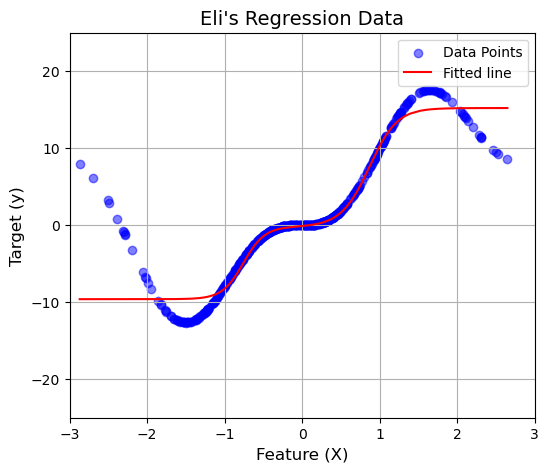

In [215]:
y_p = model(X_t).detach().numpy().squeeze()
plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, y_p, color='red', label='Fitted line')
plt.title('Eli\'s Regression Data', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.ylim([-25,25])
plt.xlim([-3,3])
plt.grid(True)
plt.legend()
plt.show()

### Please run y_p and model(X_t) explain why we do this.